# Bjoerns Test-Notebook!

In [15]:
# from __future__ import print_function
# from __future__ import division

import pandas as pd
import numpy as np

# from matplotlib import pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split
# import statsmodels.api as sm

# # TODO: Import my own functions/node?
# import sys
# sys.path.append('../src/')

from preprocessing_node import *

In [16]:
#data = pd.read_csv('../data/01_raw/dengue_features_train.csv',
#                             index_col=[0,1,2])
#data = pd.read_csv('../data/01_raw/dengue_features_train.csv',)

data = pd.read_csv('dataset_type.csv',)

# print(data.tail())
# ps(data) 


data = preprocessing(data)

ps(data)
# Result from dengue_features_train.csv: df.shape: (1456, 24)

# First result from dataset_type.csv: df.shape: (1872, 26)
# Second result from dataset_type.csv: df.shape: (1872, 27) -> "type" column encoded
# 

#print(data.head())

data['type_train'].dtypes

#data.describe()

#print(data['type_test'], data['total_cases'])

#print(data.loc[:, 'type_test'])

#data.total_cases.plot()

data.dtypes


output = prepare_submission(data)
#output.to_csv('testoutput.csv', index=False)  
# works as expected

df.shape: (1872, 27)
     city  year  weekofyear  total_cases
1456   sj  2008          18          4.0
1457   sj  2008          19          4.0
1458   sj  2008          20          4.0
1459   sj  2008          21          4.0
1460   sj  2008          22          4.0


/home/hrbjoern/Karriere/2024_CodingSchools/2024_DSR/Dengue-fever-prediction/notebooks/preprocessing_node.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


<Axes: >

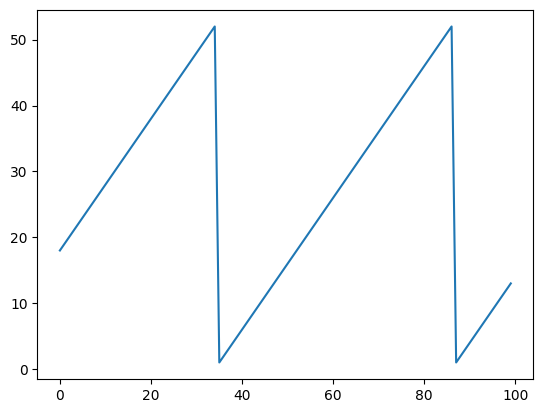

In [17]:
weeks = data['weekofyear']

weeks.head(100).plot()

<Axes: >

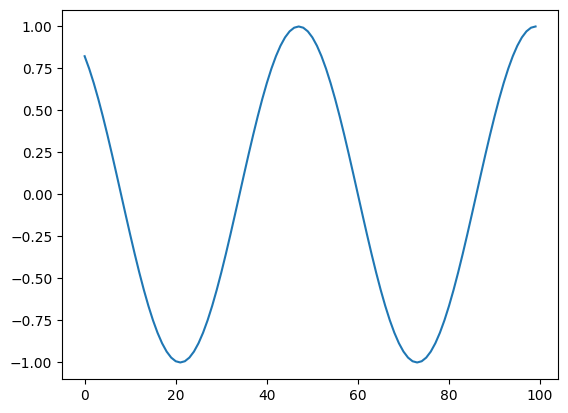

In [18]:
# weeksin = np.sin(weeks)
# weekcos = np.cos(weeks)

# from sklearn.preprocessing import FunctionTransformer
# def sin_transformer(period):
#     return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
# def cos_transformer(period):
#     return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

# From TimeSeries class, NB 6:
def fourier_sin(t, k=1, m=52):
    return np.sin(2*t*np.pi*k/m)

def fourier_cos(t, k=1, m=52):
    return np.cos(2*t*np.pi*k/m)


#(fourier_cos(weeks)+np.i*
fourier_sin(weeks.head(100)).plot()


<Axes: >

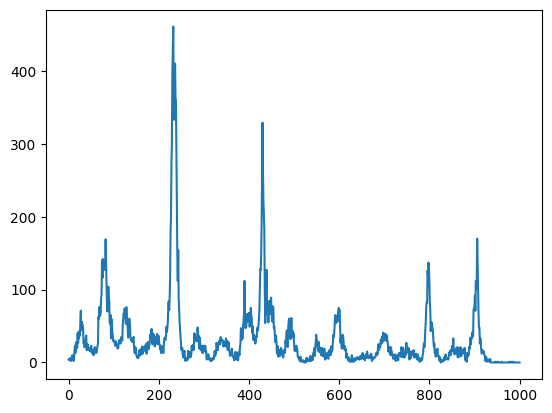

In [19]:
data.loc[:1000,'total_cases'].plot()


In [20]:
ps(data)
# add one column: 
data['woy_sin'] = week_sin(data['weekofyear'])

# and another:
data['woy_cos'] = week_cos(data['weekofyear'])

data.drop('weekofyear', axis=1, inplace=True)

ps(data)

df.shape: (1872, 28)
df.shape: (1872, 29)
